In [1]:
# ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [2]:
path = './'
df = pd.read_csv(path + "student_grades.csv")

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [4]:
df.shape

(104, 5)

In [5]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [6]:
df_iqr = pd.DataFrame()

In [7]:
df_iqr['IQR']=(df.describe()).iloc[6]-(df.describe()).iloc[4]

In [8]:
df_iqr['Range']=(df.describe()).iloc[7]-(df.describe()).iloc[3]

In [9]:
df_iqr.T

,student_id,exam1,exam2,exam3,final_grade
IQR,51.5,22.0,19.0,16.0,21.0
Range,103.0,43.0,28.0,26.0,32.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


In [11]:
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


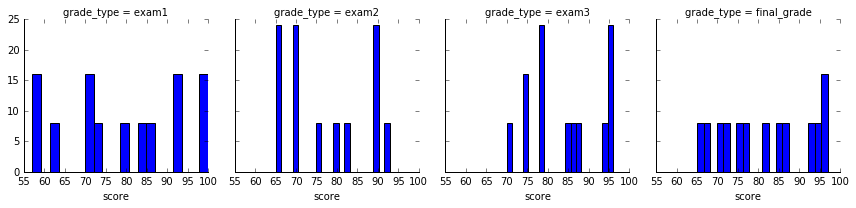

In [12]:
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20);

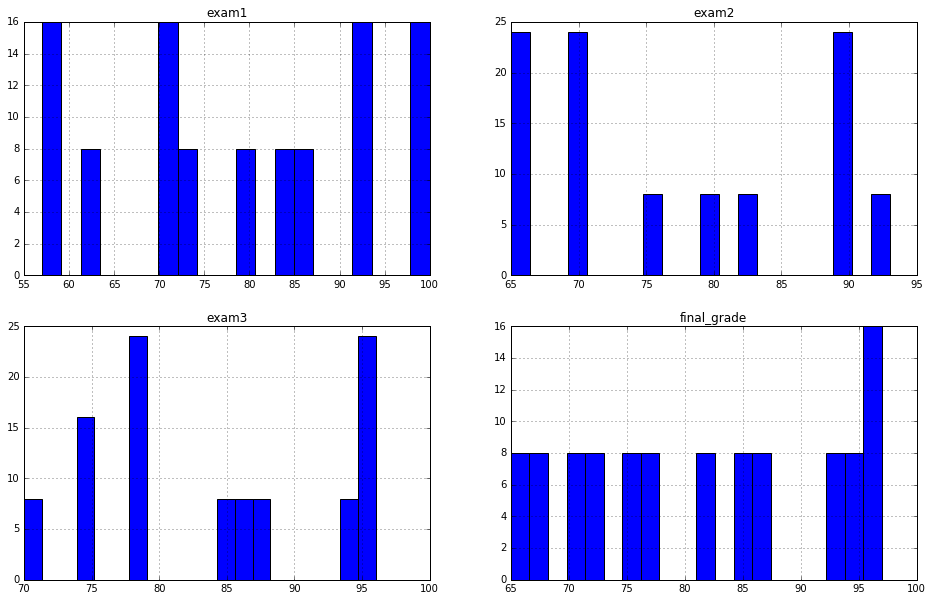

In [13]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

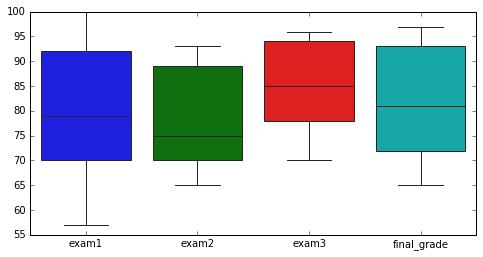

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

In [15]:
# test_train_split
X = df.drop(['final_grade','student_id'], axis=1)
y = df[['final_grade']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


# Exercise
- Write a for loop to plot each of the 3 features with final_grade using a jointplot.
- What can you say about each relationship (using pearson's r and the p-value)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

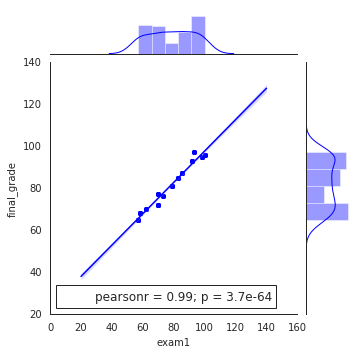

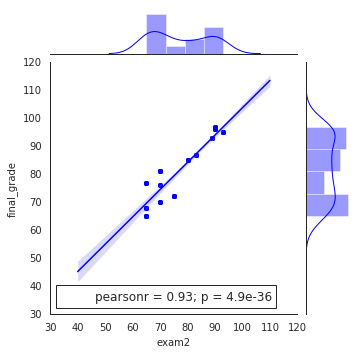

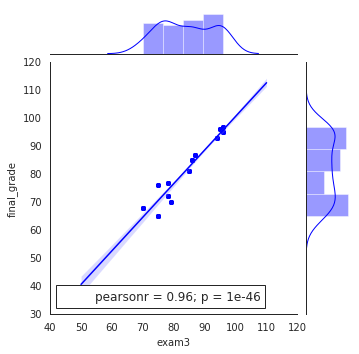

In [17]:
with sns.axes_style('white'):
    for i in range(1,4):
        j = sns.jointplot("exam{}".format(i), "final_grade", data=train, kind='reg', height=5);
        j.annotate(stats.pearsonr)
plt.show()

We can say that each exam is statistically significant beacuse the pearsonr's(0.99,0.93,0.96) approaches near 1 on all plots and the p values(3.7e-64,4.9e-36,1e-46) is far less than the alpha(0.05)

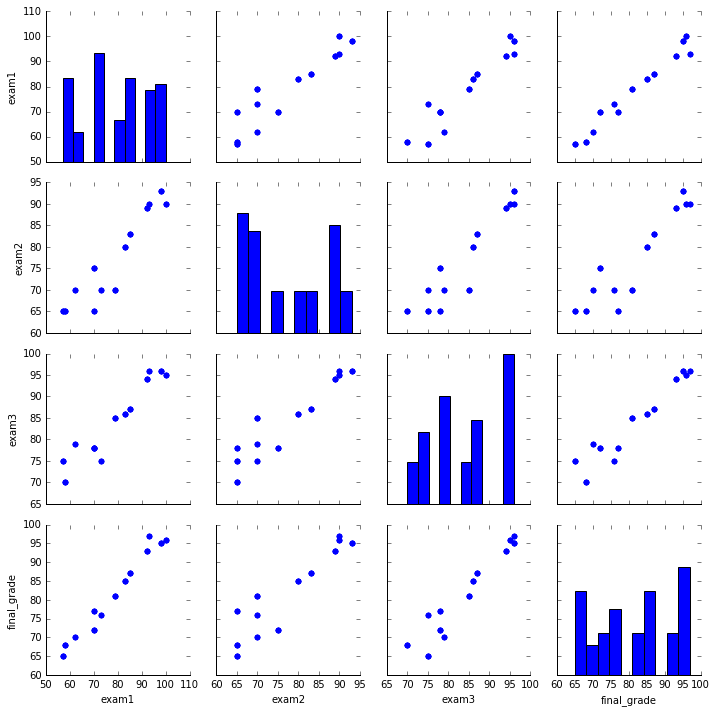

In [18]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

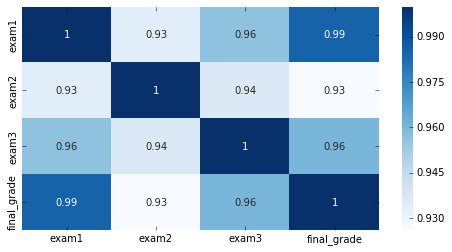

In [19]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

# Exercise
- What is the difference in using plt.show() and not using plt.show()?
- Find a way to plot a boxplot and heatmap side by side.

Using plt.show() removes the <matplotlib.axes._subplots.AxesSubplot at 0x1c1fddb5f8> from the outputted plot.

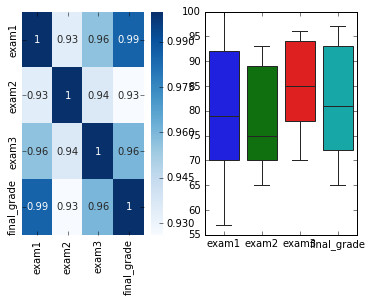

In [20]:
# fig, (ax1, ax2) = plt.subplots(1,2)
# sns.heatmap(uniform_data, ax=ax1)
# sns.boxplot(uniform_data2, ax=ax2)
# plt.show()

####

fig, ax =plt.subplots(1,2)

sns.heatmap(train.corr(), cmap='Blues', annot=True, ax=ax[0])
sns.boxplot(data=df.drop(columns=['student_id']), ax=ax[1])

plt.show()

In [21]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

In [22]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train] 

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

In [23]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

In [24]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        16:16:02   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Create linear regression objects
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [26]:
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[22.88211318]
[[0.74850854]]


In [27]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 22.88
    coefficient (m): 0.75



In [28]:
y_pred_lm1 = lm1.predict(X_train[['exam1']])

In [29]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 3.37


In [30]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

  97.12% of the variance in the students final grade can be explained by the grade on the first exam.


In [31]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [32]:
lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [33]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[12.79518052]
[[0.59709165 0.26106586]]


In [34]:
print('Multivariate - final_exam = b + m1 * exam1 + m2 * exam3')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm2_coefficients[0][1])

Multivariate - final_exam = b + m1 * exam1 + m2 * exam3
    y-intercept  (b): 12.80
    coefficient (m1): 0.60
    coefficient (m2): 0.26


In [35]:
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

In [36]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

lm2
  mse: 2.94


In [37]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

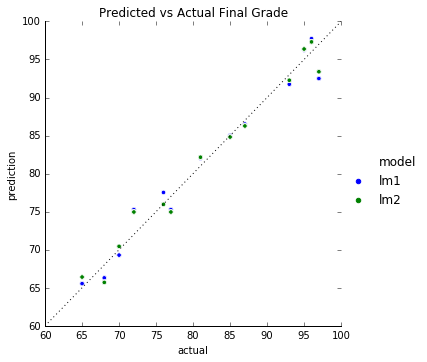

In [38]:
# the predictions are a 1 x 83 two dimensional matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

# Exercise
- What are your take-aways from the evaluation results above?
- Fit, predict, and evaluate one more model, lm3, using exam 3 only.
- How does the result of the model compare to the other two? Which should you use, based on these results?

lm2 is slightly better than lm1 because lm2 was about .4 lower and had another strong variable

In [39]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [40]:
lm3.fit(X_train[['exam3']], y_train)
print(lm1)

lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-19.62667326]
[[1.20315159]]


In [41]:
print('Univariate - final_exam = b + m * exam3')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate - final_exam = b + m * exam3
    y-intercept (b): -19.63
    coefficient (m): 1.20



In [42]:
y_pred_lm3 = lm3.predict(X_train[['exam3']])

In [43]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3))

lm3
  mse: 9.08


In [44]:
r2_lm3 = r2_score(y_train, y_pred_lm3)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the thrid exam.'.format(r2_lm3))

  92.24% of the variance in the students final grade can be explained by the grade on the thrid exam.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

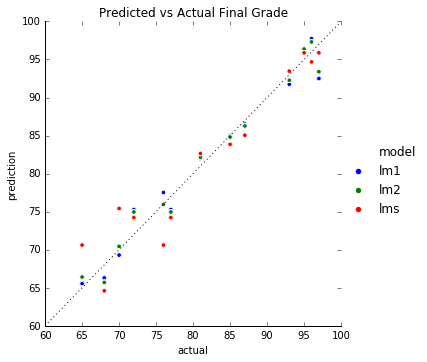

In [45]:
# the predictions are a 1 x 83 two dimensional matrix, but we want just
# a single array of predictions. We can use the .ravel method to achieve
# this.

pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel(),
             'lms': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

The result for lm3 is a bit less confident than lm2 and lm1. Either lm1 or lm2 would be better to use than lm3. The rsquare for lm1(97.12%) and lm2(97.49%) were barely any different so they could both be used with a a high degree of confidence.

In [46]:
# Make predictions using the testing set
y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])

In [47]:
mse = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse)

Mean squared error: 3.42


In [48]:
r2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2))

97.20% of the variance in the students final grade can be explained by the grades on the first 3 exams.


Text(0, 0.5, 'Residuals')

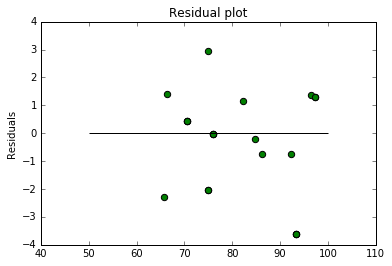

In [49]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

- Predict final grades of the out-of-sample data (test dataframe) and evaluate results.

- Which model performs the best, based on the 2 out-of-sample evaluation results (the example one, lm1, and the exercise one, lm3, from the above exercise).

# TESTING PHASE

In [50]:
t1_lm1 = LinearRegression()
print(t1_lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [51]:
t1_lm1.fit(X_test[['exam1']], y_test)
print(t1_lm1)

t1_lm1_y_intercept = t1_lm1.intercept_
print(t1_lm1_y_intercept)

t1_lm1_coefficients = t1_lm1.coef_
print(t1_lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[21.72208448]
[[0.76843027]]


In [52]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % t1_lm1_y_intercept)
print('    coefficient (m): %.2f' % t1_lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 21.72
    coefficient (m): 0.77



In [53]:
y_pred_t1_lm1 = t1_lm1.predict(X_test[['exam1']])

In [54]:
mse_t1_lm1 = mean_squared_error(y_test, y_pred_t1_lm1)
print("t1_lm1\n  mse: {:.3}".format(mse_t1_lm1))

t1_lm1
  mse: 4.51


In [55]:
r2_t1_lm1 = r2_score(y_test, y_pred_t1_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_t1_lm1))

  96.31% of the variance in the students final grade can be explained by the grade on the first exam.


In [56]:
y_test

,final_grade
26,96
61,70
2,87
62,68
85,76
48,70
16,85
99,77
56,97
45,93


# need to check other code against mine for the above